# Neural Networks - Learning a Sine Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Activation functions

In [2]:
#sigmoid function
def g(a): #shifted
    return (2/(1+np.exp(-a))) - 1 
def G(a): #unshifted
    return 1/(1+np.exp(-a))
def g_prime(a):
    return 2*G(a)*(1-G(a))

#sine function
# def g(a):
#     return np.sin(2*np.pi*a)
# def g_prime(a):
#     return np.cos(2*np.pi*a)

In [3]:
order = 12
N = 30
w_kj = np.random.random(order)

x = np.linspace(0,1,N)
x_vector = np.zeros((len(x),order))

for i in range(len(x)):
    for j in range(order):
        x_vector[i,j] = x[i]**j

### Generate noisy data points following a sine wave

In [4]:
noise = np.random.normal(0,np.sqrt(0.05),N)
output = np.sin(2*np.pi*x) #+ noise

## Main Algorithm for Neural Networks

In [5]:
def neural_net(X,w_kj,index):
    #output unit
    a_k = np.sum(w_kj*X)
    y_k = g(a_k)
    
    #expected output
    t_k = np.sin(2*np.pi*X[1]) #output[index] #np.sin(2*np.pi*X[1])
    
    #error of output units
    delta_k = g_prime(a_k)*(y_k-t_k)

    #error derivatives
    error_kj = delta_k*X
    
    #total sum of squares error
    E_q = ((y_k-t_k)**2)/2
    
    return E_q,error_kj

## Test neural network to curve fit the generate noisy sine wave

In [6]:
counter = 0
e_vals = []

while True:
    E = []
    error_kj = []
    
    index = 0
    for X in x_vector:
        E_q,e_kj = neural_net(X,w_kj,index)
        E.append(E_q)
        error_kj.append(e_kj)
        index += 1
    
    #count epochs
    counter += 1
    e_vals.append(np.sum(E))
    
    #calculating change in weights
    learning_rate = 0.1
    delta_wkj = -learning_rate*np.sum(error_kj,axis=0)
    
    #change weights
    w_kj += delta_wkj
    
    #minimizing error
    if np.sum(E) < 0.1:
        break

## Plot the convergence of the Neural Network on the noisy sine wave

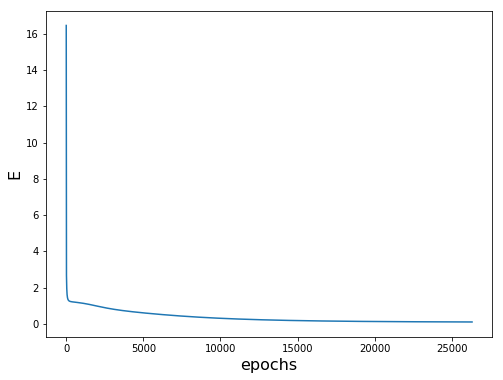

In [7]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(counter),e_vals)
plt.xlabel('epochs',fontsize=16)
plt.ylabel('E',fontsize=16)
# plt.savefig('convergence2.png',dpi=300,bbox_inches='tight')
plt.show()

## Test neural network to curve fit a sine function

In [8]:
test = np.linspace(0,1)
test_vector = np.zeros((len(test),order))

for i in range(len(test)):
    for j in range(order):
        test_vector[i,j] = test[i]**j

## Plot the convergence of the Neural Network on the sine wave

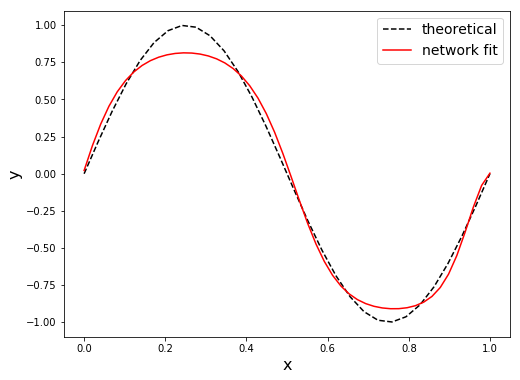

In [12]:
test_vals = []

for t in test_vector:
    test_vals.append(g(np.sum(t*w_kj)))

plt.figure(figsize=(8,6))
plt.plot(x,np.sin(2*np.pi*x),label='theoretical',c='black',linestyle='--')
# plt.scatter(x,output,c='black')
plt.plot(test_vector[:,1],test_vals,label='network fit',color='red')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.legend(fontsize=14)
# plt.savefig('generated2.png',dpi=300,bbox_inches='tight')

plt.show()